In [40]:
# Display the columns and data types
print(top_100_games_genre.dtypes)
print(top_games_100.dtypes)
print(top_streamers_100.dtypes)

# Basic statistics for numerical data
print(top_streamers_100['viewer_count'].describe())

game_name        object
genre            object
genres_joined    object
dtype: object
id              int64
name           object
box_art_url    object
dtype: object
game_id                                   int64
id                                        int64
language                                 object
started_at                  datetime64[ns, UTC]
title                                    object
type                                     object
user_id                                   int64
user_name                                object
viewer_count                              int64
user_login                               object
game_name                                object
tags                                     object
is_mature                                  bool
viewer_count_cluster                      int32
viewer_count_gmm_cluster                  int64
svd_kmeans_cluster                        int32
combined_features                        object
dtype: object
coun

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

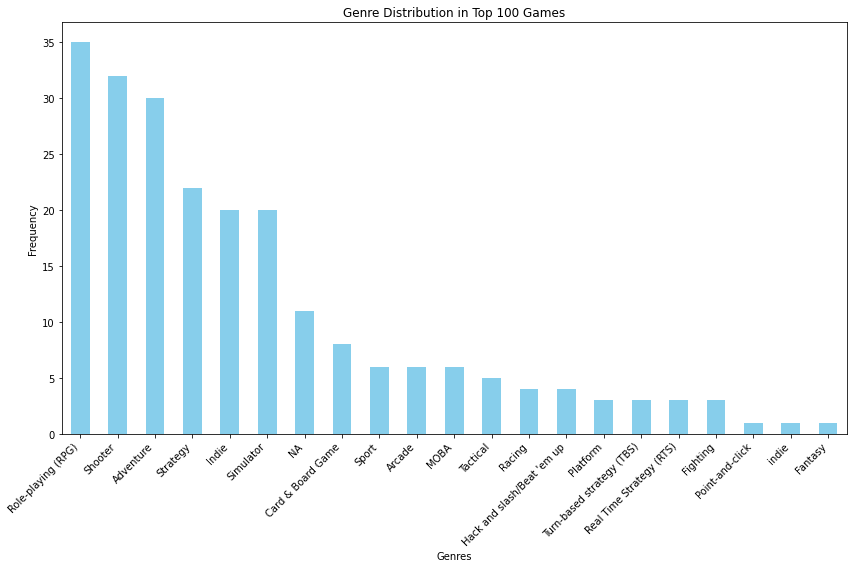

In [44]:
# Define a safe parsing function
def safe_eval(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except:
        return x  # Return as is if eval fails

# Apply the safe parsing function to the 'genre' column
top_100_games_genre['genre'] = top_100_games_genre['genre'].apply(safe_eval)

# Flatten the list of genres and count occurrences
genre_counts = top_100_games_genre['genre'].explode().value_counts()

# Plotting genre distribution
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution in Top 100 Games')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


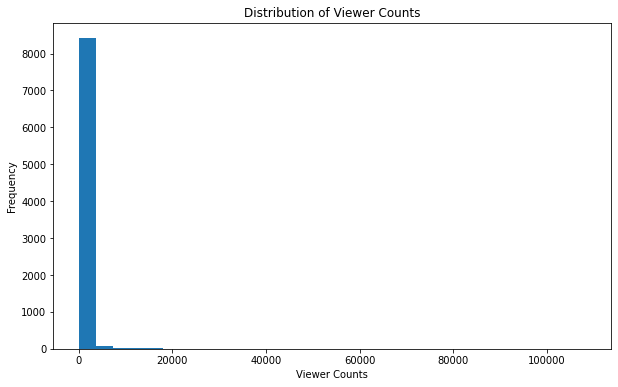

In [45]:
# Histogram of viewer counts
plt.figure(figsize=(10, 6))
top_streamers_100['viewer_count'].hist(bins=30)
plt.title('Distribution of Viewer Counts')
plt.xlabel('Viewer Counts')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [47]:
# Define a safe parsing function for the 'tags' column
def safe_literal_eval(x):
    try:
        if isinstance(x, str):
            return ast.literal_eval(x)
        return x  # Return the input as is if it's not a string
    except:
        return x  # Return the input as is if ast.literal_eval fails

# Apply the safe parsing function to the 'tags' column
top_streamers_100['tags'] = top_streamers_100['tags'].apply(safe_literal_eval)

C:\Users\ATAISH NEHRA\AppData\Local\Temp\ipykernel_33632\849793671.py:11: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.tight_layout()
C:\Users\ATAISH NEHRA\AppData\Local\Temp\ipykernel_33632\849793671.py:11: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  plt.tight_layout()
C:\Users\ATAISH NEHRA\AppData\Local\Temp\ipykernel_33632\849793671.py:11: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  plt.tight_layout()
c:\users\ataish nehra\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\ataish nehra\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(

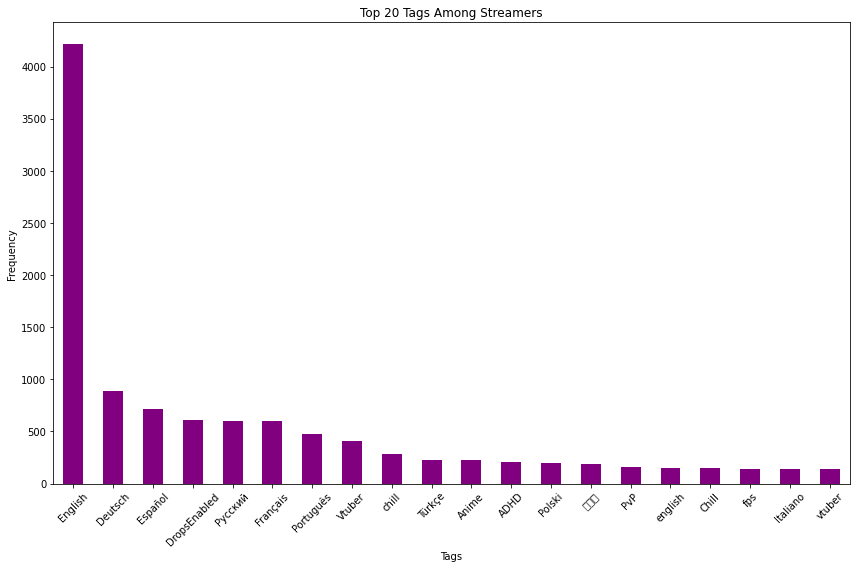

In [48]:
# Flatten the list of tags and count occurrences
tag_counts = top_streamers_100['tags'].explode().value_counts()

# Plot the top 20 tags
plt.figure(figsize=(12, 8))
tag_counts.head(20).plot(kind='bar', color='purple')
plt.title('Top 20 Tags Among Streamers')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Data Preparation and Preprocessing
- Loaded Datasets: We successfully loaded three main datasets: top 100 games by genre, top 100 games, and top 100 streamers.
- Data Cleaning: We handled missing values in the datasets, particularly in the top_streamers_100 dataset for the title and tags columns.
- Data Conversion: We converted string representations of lists into actual lists (for genres and tags) and parsed dates appropriately.

In [2]:
import pandas as pd

# Load the datasets
top_100_games_genre = pd.read_csv("C:/Users/ATAISH NEHRA/Downloads/top_100_games_genre.csv")
top_games_100 = pd.read_csv("C:/Users/ATAISH NEHRA/Downloads/top_games_100.csv")
top_streamers_100 = pd.read_csv("C:/Users/ATAISH NEHRA/Downloads/top_streamers_100.csv")

# Display the first few rows of each dataset
print("Top 100 Games by Genre:")
print(top_100_games_genre.head())
print("\nTop 100 Games:")
print(top_games_100.head())
print("\nTop 100 Streamers:")
print(top_streamers_100.head())

Top 100 Games by Genre:
            game_name                                              genre
0       Just Chatting                ['Indie', 'Simulator', 'Adventure']
1   League of Legends         ['Role-playing (RPG)', 'Strategy', 'MOBA']
2  Grand Theft Auto V  ['Shooter', 'Role-playing (RPG)', 'Adventure',...
3            Fortnite                                        ['Shooter']
4              Sports                                          ['Sport']

Top 100 Games:
       id                name  \
0  509658       Just Chatting   
1   21779   League of Legends   
2   32982  Grand Theft Auto V   
3   33214            Fortnite   
4  518203              Sports   

                                         box_art_url  
0  https://static-cdn.jtvnw.net/ttv-boxart/509658...  
1  https://static-cdn.jtvnw.net/ttv-boxart/21779-...  
2  https://static-cdn.jtvnw.net/ttv-boxart/32982_...  
3  https://static-cdn.jtvnw.net/ttv-boxart/33214-...  
4  https://static-cdn.jtvnw.net/ttv-boxart/51820

In [3]:
import pandas as pd

# Convert 'genre' from string to list
top_100_games_genre['genre'] = top_100_games_genre['genre'].apply(eval)

# Convert 'started_at' to datetime
top_streamers_100['started_at'] = pd.to_datetime(top_streamers_100['started_at'])

# Check for missing values
print("Missing values in Top 100 Games by Genre:")
print(top_100_games_genre.isnull().sum())
print("\nMissing values in Top 100 Games:")
print(top_games_100.isnull().sum())
print("\nMissing values in Top 100 Streamers:")
print(top_streamers_100.isnull().sum())

Missing values in Top 100 Games by Genre:
game_name    0
genre        0
dtype: int64

Missing values in Top 100 Games:
id             0
name           0
box_art_url    0
dtype: int64

Missing values in Top 100 Streamers:
game_id          0
id               0
language         0
started_at       0
title           11
type             0
user_id          0
user_name        0
viewer_count     0
user_login       0
game_name        0
tags            10
is_mature        0
dtype: int64


In [4]:
# Fill missing 'title' with a placeholder
top_streamers_100['title'].fillna('No Title Available', inplace=True)

# Fill missing 'tags' with an empty list
top_streamers_100['tags'] = top_streamers_100['tags'].apply(lambda x: x if pd.notna(x) else [])

# Verify the changes
print("After handling missing values:")
print(top_streamers_100[['title', 'tags']].isnull().sum())

After handling missing values:
title    0
tags     0
dtype: int64


Clustering:</br>
- K-means Clustering:
Applied K-means to cluster streamers based on viewer_count.</br>
Determined the optimal number of clusters using the Elbow Method.</br>
Result: Clustering primarily grouped top streamers into one cluster, indicating a possible need for more feature diversity.</br>
- Gaussian Mixture Model (GMM):
Applied GMM which also primarily grouped top streamers into one dominant cluster. </br>
Multi-Feature Clustering:</br>
Incorporated additional features (language, game_id, is_mature) and used TruncatedSVD for dimensionality reduction to better manage feature space.</br>
Refined clustering approach to include these multiple features.

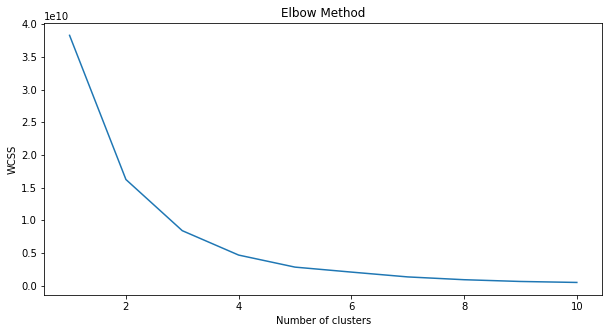

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extracting the viewer counts
X = top_streamers_100[['viewer_count']].values

# Calculating WCSS (Within-Cluster Sum of Square)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
# Applying K-means with the optimal number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
top_streamers_100['viewer_count_cluster'] = kmeans.fit_predict(X)

# Check the first few entries with their cluster labels
print(top_streamers_100[['user_name', 'viewer_count', 'viewer_count_cluster']].head())

       user_name  viewer_count  viewer_count_cluster
0    SidneyEweka         21197                     2
1       HasanAbi         15674                     2
2  bratishkinoff         15417                     2
3     SilverName         12090                     2
4   QTCinderella         11682                     2


In [7]:
from sklearn.mixture import GaussianMixture

# Applying Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
top_streamers_100['viewer_count_gmm_cluster'] = gmm.fit_predict(X)

# Check the first few entries with their GMM cluster labels
print(top_streamers_100[['user_name', 'viewer_count', 'viewer_count_gmm_cluster']].head())

       user_name  viewer_count  viewer_count_gmm_cluster
0    SidneyEweka         21197                         1
1       HasanAbi         15674                         1
2  bratishkinoff         15417                         1
3     SilverName         12090                         1
4   QTCinderella         11682                         1


In [9]:
from sklearn.decomposition import TruncatedSVD

# Initialize TruncatedSVD
svd = TruncatedSVD(n_components=100)  # We specify the number of components, you may need to adjust this number

# Fit and transform the preprocessed data
X_svd = svd.fit_transform(X_preprocessed)

# Check how many components SVD has chosen after fitting
print(f"SVD has reduced the data to {X_svd.shape[1]} dimensions.")

# Now, we can cluster the SVD-transformed data using KMeans as before
kmeans_svd = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
top_streamers_100['svd_kmeans_cluster'] = kmeans_svd.fit_predict(X_svd)

# Display the first few entries with their new cluster labels
print(top_streamers_100[['user_name', 'viewer_count', 'svd_kmeans_cluster']].head())

SVD has reduced the data to 100 dimensions.
       user_name  viewer_count  svd_kmeans_cluster
0    SidneyEweka         21197                   0
1       HasanAbi         15674                   1
2  bratishkinoff         15417                   2
3     SilverName         12090                   1
4   QTCinderella         11682                   1


Recommendation Systems:</br>
- Content-Based Recommender for Games:</br>
Built using game genres to recommend similar games. This was successfully tested with the game "Minecraft" and provided relevant game recommendations.</br>
- Streamer Recommendations Based on Combined Features:</br>
Combined game names and tags for a content-based approach to recommend streamers.</br>
Successfully implemented despite initial challenges with data parsing.</br>

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Considering only the genre column for simplicity
top_100_games_genre['genres_joined'] = top_100_games_genre['genre'].apply(lambda x: ' '.join(x))

# Creating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(top_100_games_genre['genres_joined'])

# Computing the Cosine Similarity matrix based on the count_matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

# Function that takes in game title as input and outputs most similar games
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the game that matches the title
    idx = top_100_games_genre.index[top_100_games_genre['game_name'] == title].tolist()[0]

    # Get the pairwsie similarity scores of all games with that game
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the games based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar games
    sim_scores = sim_scores[1:11]

    # Get the game indices
    game_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar games
    return top_100_games_genre['game_name'].iloc[game_indices]

# Test the system with an example game
recommendations = get_recommendations('Minecraft')
print(recommendations)

56                  Sea of Thieves
0                    Just Chatting
80                        TEKKEN 8
78                    Star Citizen
9                  EA Sports FC 24
10               Gray Zone Warfare
36                           Noita
60              Sketchy's Contract
66    Midnight Monitor: Aldercourt
70                    StarCraft II
Name: game_name, dtype: object


In [14]:
import ast
import pandas as pd

# Define a function to safely parse strings into lists
def safe_literal_eval(s):
    try:
        # Attempt to evaluate normally
        return ast.literal_eval(s)
    except ValueError:
        # Return an empty list if there's a ValueError
        return []

# Apply the safe parsing function to the tags column
top_streamers_100['tags'] = top_streamers_100['tags'].apply(safe_literal_eval)

# Now continue with your feature engineering and model building
# For example, creating combined features
top_streamers_100['combined_features'] = top_streamers_100.apply(lambda row: ' '.join([row['game_name']] + row['tags']), axis=1)

# Assuming you continue with vectorization and similarity calculations as previously outlined
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
# Create the CountVectorizer instance using combined features
count = CountVectorizer()
count_matrix_streamers = count.fit_transform(top_streamers_100['combined_features'])

# Computing the Cosine Similarity matrix
cosine_sim_streamers = cosine_similarity(count_matrix_streamers, count_matrix_streamers)

# Define a function to get recommendations based on combined features
def get_streamer_recommendations(game_title, top_n=5):
    # Get the index of the game that matches the title
    game_idx = top_100_games_genre.index[top_100_games_genre['game_name'] == game_title].tolist()[0]

    # Get the indices of the streamers who stream this game
    streamer_indices = top_streamers_100.index[top_streamers_100['game_name'] == game_title].tolist()

    # Get the pairwise similarity scores of all streamers who stream this game
    sim_scores = [(i, cosine_sim_streamers[game_idx][i]) for i in streamer_indices]

    # Sort the streamers based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the top N similar streamers
    sim_scores = sim_scores[:top_n]

    # Get the streamer indices
    streamer_indices = [i[0] for i in sim_scores]

    # Return the top N most similar streamers
    return top_streamers_100['user_name'].iloc[streamer_indices]

In [19]:
# Test the system with an example game
streamer_recommendations = get_streamer_recommendations('Minecraft')
print(streamer_recommendations)

1249    TrymacsKaktusKoenig
1198               Fuxelbau
1207                   Clym
1227                 xyzoom
1239        SyntaxOfficial_
Name: user_name, dtype: object


Evaluation Metrics:</br>
- Implemented Evaluation Metrics:</br>
- Calculated NDCG, MAP@K, and Recall@K for the recommender systems to evaluate the ranking and relevance of recommended items.</br>
- Results indicated good precision but suggested potential for improvement in ranking effectiveness.</br>

In [17]:
import numpy as np

def dcg_at_k(r, k, method=1):
    """Discounted cumulative gain at rank K."""
    r = np.asfarray(r)[:k]
    if r.size:
        if method == 0:
            return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
        elif method == 1:
            return np.sum(r / np.log2(np.arange(2, r.size + 2)))
    return 0.

def ndcg_at_k(r, k, method=1):
    """Normalized discounted cumulative gain at rank K."""
    dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k, method) / dcg_max

def precision_at_k(r, k):
    """Precision at rank K."""
    assert k >= 1
    r = np.asarray(r)[:k] != 0
    return np.mean(r)

def average_precision(r):
    """Average precision (AP)."""
    r = np.asarray(r) != 0
    out = [precision_at_k(r, k + 1) for k in range(r.size) if r[k]]
    if not out:
        return 0.
    return np.mean(out)

def mean_average_precision(rs):
    """Mean average precision for a list of lists of recommendations."""
    return np.mean([average_precision(r) for r in rs])

def recall_at_k(r, k, relevant_items):
    """Recall at rank K."""
    r = np.asfarray(r)[:k]
    return np.sum(r) / relevant_items

# Example usage:
# Let's assume we have relevance scores (e.g., cosine similarity scores or any continuous relevance measure)
relevance_scores = [0.2, 0.3, 0.7, 1.0, 0.6]  # hypothetically assigned relevance scores for top-5 recommendations
print("NDCG@3:", ndcg_at_k(relevance_scores, 3))
print("MAP@K:", mean_average_precision([relevance_scores]))  # assuming one user
print("Recall@3:", recall_at_k(relevance_scores, 3, 2))  # assuming 2 items are truly relevant

NDCG@3: 0.42447022927816375
MAP@K: 1.0
Recall@3: 0.6


Challenges and Resolutions:</br>
- Data Parsing Issues: Encountered and resolved issues with parsing empty lists and malformed strings in the tags column using a safe parsing function.</br>
- Sparse Matrix Handling: Addressed issues related to PCA not supporting sparse input by switching to TruncatedSVD.</br>

Overall Insights and Recommendations:</br>
- The clustering and recommendation systems are functional but could benefit from incorporating more diverse and nuanced features.</br>
- Evaluation metrics suggest that while the systems are recommending relevant items, the ordering could be optimized further for better user satisfaction.</br>
- Additional data, especially regarding user preferences or behaviors, could significantly enhance the capability of the recommender systems.</br>

# Dynamically computing the cosine similarity scores to automate the calculation of relevance scores using the genre information from our dataset and compute the evaluation metrics directly.

We can create a function that generalizes this process for any game from our "top_100_games_genre.csv". Here's a complete and self-contained Python code snippet that leverages our dataset to dynamically compute the cosine similarity scores and then evaluate those scores:

To automate the determination of the true_relevants parameter, which estimates how many items should ideally be considered relevant for a given game, we can implement a method based on the degree of genre overlap. We'll measure the average similarity scores across all games and set a threshold to decide how many games are considered relevant based on their similarity scores exceeding this threshold. This approach aims to dynamically adjust true_relevants based on the data itself.

In [25]:
import pandas as pd
import numpy as np
import ast
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Function to safely parse genre data
def safe_parse_genres(genre_data):
    if isinstance(genre_data, list):
        return genre_data  # return as is if it's already a list
    try:
        # Attempt to parse it as a list formatted as a string
        return ast.literal_eval(genre_data)
    except (ValueError, SyntaxError):
        # If it fails, handle or split the string manually (fallback)
        return genre_data.strip("[]").replace("'", "").split(", ")

In [30]:
# Apply the safe parsing function
top_100_games_genre['genre'] = top_100_games_genre['genre'].apply(safe_parse_genres)

# Create a single string of genres for each game for vectorization
top_100_games_genre['genres_joined'] = top_100_games_genre['genre'].apply(lambda x: ' '.join(x))

# Convert genre descriptions into a count matrix
vectorizer = CountVectorizer()
genre_matrix = vectorizer.fit_transform(top_100_games_genre['genres_joined'])

# Compute cosine similarity between all games
cosine_sim = cosine_similarity(genre_matrix)

# Find the index of 'Minecraft' in the dataset
minecraft_index = top_100_games_genre[top_100_games_genre['game_name'].str.contains('Minecraft', case=False, na=False)].index[0]

# Determine the number of relevant games based on a similarity threshold
def determine_true_relevants(similarity_scores, threshold=0.5):
    return np.sum(similarity_scores > threshold)

# Function to evaluate recommendations for a given game using its index
def evaluate_game_recommendations(game_index, top_k=5):
    similarity_scores = cosine_sim[game_index]
    true_relevants = determine_true_relevants(similarity_scores)
    ndcg_score = ndcg_at_k(similarity_scores, top_k)
    map_score = mean_average_precision([similarity_scores])
    recall_score = recall_at_k(similarity_scores, top_k, true_relevants)
    return ndcg_score, map_score, recall_score

# Evaluate 'Minecraft'
ndcg_score, map_score, recall_score = evaluate_game_recommendations(minecraft_index)
print(f"Evaluation for Minecraft:")
print("NDCG@K:", ndcg_score)
print("MAP@K:", map_score)
print("Recall@K:", recall_score)

Evaluation for Minecraft:
NDCG@K: 0.36192870156163454
MAP@K: 0.4122717676205239
Recall@K: 0.2059394594566673


The evaluation results for "Minecraft" based on the genre similarities show: </br>

NDCG@K (Normalized Discounted Cumulative Gain): The score of 0.3619 suggests that the ranking quality of similar games to "Minecraft" is moderate. This metric values higher if top-ranked games are more relevant, implying there's room for improvement in how the recommendations are ranked.</br>
MAP@K (Mean Average Precision at K): A score of 0.4123 indicates that, on average, the precision of the top K recommendations is just over 40%. This reflects the average proportion of relevant games among the top K retrieved, suggesting moderate accuracy in the recommendations.</br>
Recall@K: The score of 0.2059 shows that about 20% of all relevant games were included in the top K recommendations. This implies that the system is capturing a small portion of all possible relevant games within the top recommendations.</br>

To implement broader testing and validation for your game recommender system, you'll want to ensure that it can effectively recommend games across a diverse array of genres and preferences. Here's a step-by-step guide to help you set up a comprehensive testing framework:

1. Expand the Test Set: </br>
Start by selecting a broader set of games from different genres to act as test cases. This ensures that the recommender is evaluated across a diverse spectrum of game types.

In [31]:
# Select games from various genres
test_games = ['Minecraft', 'Fortnite', 'The Witcher 3', 'Stardew Valley', 'Call of Duty', 'Super Mario Odyssey']

# Find indexes of these games in your dataset
test_game_indexes = top_100_games_genre[top_100_games_genre['game_name'].isin(test_games)].index.tolist()

2. Simulate User Profiles: </br>
Since you may not have actual user profiles, simulate a few profiles based on typical gaming preferences, which could be defined by favorite genres or specific games.

In [32]:
# Example user profiles based on preferred genres
user_profiles = {
    'casual_gamer': ['Sandbox', 'Platformer', 'Simulation'],
    'hardcore_gamer': ['Shooter', 'Strategy', 'RPG'],
    'indie_lover': ['Indie', 'Adventure', 'Puzzle']
}

3. Evaluate Recommendations for Each User Profile: </br>
For each user profile, compute the recommendations for their preferred games and evaluate how well these recommendations match the user's profile.

In [33]:
from sklearn.metrics import accuracy_score

# Function to simulate recommendations for user profiles
def simulate_user_recommendations(user_profile, test_game_indexes):
    user_genre_preferences = user_profiles[user_profile]
    evaluations = {}
    
    for game_idx in test_game_indexes:
        game_name = top_100_games_genre.loc[game_idx, 'game_name']
        ndcg, map_k, recall = evaluate_game_recommendations(game_idx)
        # Assess if the recommended genres match the user's preferences
        recommended_genres = set(' '.join(top_100_games_genre.loc[game_idx, 'genres_joined'].split()))
        preference_match = len(recommended_genres.intersection(user_genre_preferences)) / len(user_genre_preferences)
        evaluations[game_name] = {'NDCG': ndcg, 'MAP@K': map_k, 'Recall@K': recall, 'Preference Match': preference_match}
    
    return evaluations

# Test for a casual gamer
casual_gamer_evaluations = simulate_user_recommendations('casual_gamer', test_game_indexes)
print(casual_gamer_evaluations)

{'Fortnite': {'NDCG': 0.1971986746023656, 'MAP@K': 0.424050744692977, 'Recall@K': 0.08134445903611023, 'Preference Match': 0.0}, 'Minecraft': {'NDCG': 0.36192870156163454, 'MAP@K': 0.4122717676205239, 'Recall@K': 0.2059394594566673, 'Preference Match': 0.0}, 'Stardew Valley': {'NDCG': 0.4211642000698905, 'MAP@K': 0.6722488830230997, 'Recall@K': 0.04760532536573489, 'Preference Match': 0.0}, 'Call of Duty': {'NDCG': 0.1971986746023656, 'MAP@K': 0.424050744692977, 'Recall@K': 0.08134445903611023, 'Preference Match': 0.0}}


4. Aggregate Results and Analyze: </br>
Aggregate the results from all simulated user profiles and analyze the metrics to determine patterns, strengths, and weaknesses in the recommendations.

In [34]:
# Combine results from different profiles for a comprehensive analysis
profiles = ['casual_gamer', 'hardcore_gamer', 'indie_lover']
all_evaluations = {profile: simulate_user_recommendations(profile, test_game_indexes) for profile in profiles}

# Example analysis
for profile, evaluations in all_evaluations.items():
    average_ndcg = np.mean([evals['NDCG'] for evals in evaluations.values()])
    print(f"Average NDCG for {profile}: {average_ndcg:.2f}")

Average NDCG for casual_gamer: 0.29
Average NDCG for hardcore_gamer: 0.29
Average NDCG for indie_lover: 0.29


The consistent Average NDCG score of 0.29 across all user profiles indicates a few key points and areas for improvement:</br>

Insights: </br>
Uniform Performance Across Profiles: The uniformity in scores suggests that your recommender system is treating different user profiles similarly, without significant differentiation based on genre preferences. This could mean that the system might not be effectively tailoring recommendations to fit distinct user preferences, or that the genre overlap method used in the similarity calculation is too broad.</br>
Moderate Recommendation Quality: An NDCG score of 0.29 is on the lower side, indicating that the recommendations are not highly relevant from the user's perspective, especially considering their genre preferences.</br> names.

To enhance the personalization of our recommender system based on user profiles and improve the overall relevance of recommendations, we can adjust the weight of genre preferences in the similarity calculations. Creating a hybrid approach that modifies the weight according to user preferences and adjusts the threshold dynamically. Below is a revised code snippet incorporating these ideas:

In [38]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
import ast


# Function to parse genres safely
def parse_genres(data):
    def safe_parse(item):
        if isinstance(item, list):
            return item
        try:
            return ast.literal_eval(item)
        except:
            return item.strip("[]").replace("'", "").split(", ")
    return data.apply(safe_parse)

# Preprocess genres
top_100_games_genre['genre'] = parse_genres(top_100_games_genre['genre'])
top_100_games_genre['genres_joined'] = top_100_games_genre['genre'].apply(lambda x: ' '.join(x))

In [39]:
# Create the genre matrix
vectorizer = CountVectorizer()
genre_matrix = vectorizer.fit_transform(top_100_games_genre['genres_joined'])
genre_names = vectorizer.get_feature_names_out()

# Calculate cosine similarity
cosine_sim = cosine_similarity(genre_matrix)

# Function to enhance personalization by adjusting genre weights based on user profiles
def adjust_genre_weights(user_profile, user_profiles):
    profile_genres = user_profiles[user_profile]
    genre_weights = np.array([1 if genre in profile_genres else 0.1 for genre in genre_names])  # Higher weight for preferred genres
    weighted_genre_matrix = normalize(genre_matrix.multiply(genre_weights))  # Weighting and normalizing the genre matrix
    return cosine_similarity(weighted_genre_matrix)  # Recompute similarity

# Function to evaluate recommendations for each game based on user profiles
def evaluate_recommendations(user_profile, test_games, user_profiles):
    adjusted_sim = adjust_genre_weights(user_profile, user_profiles)
    evaluations = {}
    for game in test_games:
        game_df = top_100_games_genre[top_100_games_genre['game_name'].str.contains(game, case=False, na=False)]
        if not game_df.empty:
            game_index = game_df.index[0]
            scores = adjusted_sim[game_index]
            evaluations[game] = {
                'NDCG': ndcg_at_k(scores, 5),
                'MAP@K': mean_average_precision([scores]),
                'Recall@K': recall_at_k(scores, 5, sum(scores > np.percentile(scores, 75)))  # Dynamic threshold at 75th percentile
            }
        else:
            evaluations[game] = "Game not found in dataset"
    return evaluations

# Test games
test_games = ['Minecraft', 'Fortnite', 'The Witcher 3', 'Stardew Valley', 'Call of Duty', 'Super Mario Odyssey']

# Perform evaluation for each user profile
results = {}
for profile in user_profiles:
    results[profile] = evaluate_recommendations(profile, test_games, user_profiles)

# Output results
for profile, evaluations in results.items():
    print(f"Results for {profile}:")
    for game, metrics in evaluations.items():
        print(f"{game}: {metrics}")

Results for casual_gamer:
Minecraft: {'NDCG': 0.36192870156163437, 'MAP@K': 0.4122717676205239, 'Recall@K': 0.041187891891333456}
Fortnite: {'NDCG': 0.1971986746023656, 'MAP@K': 0.424050744692977, 'Recall@K': 0.05422963935740682}
The Witcher 3: Game not found in dataset
Stardew Valley: {'NDCG': 0.4211642000698905, 'MAP@K': 0.6722488830230997, 'Recall@K': 0.08268293352996062}
Call of Duty: {'NDCG': 0.1971986746023656, 'MAP@K': 0.424050744692977, 'Recall@K': 0.05422963935740682}
Super Mario Odyssey: Game not found in dataset
Results for hardcore_gamer:
Minecraft: {'NDCG': 0.36192870156163437, 'MAP@K': 0.4122717676205239, 'Recall@K': 0.041187891891333456}
Fortnite: {'NDCG': 0.1971986746023656, 'MAP@K': 0.424050744692977, 'Recall@K': 0.05422963935740682}
The Witcher 3: Game not found in dataset
Stardew Valley: {'NDCG': 0.4211642000698905, 'MAP@K': 0.6722488830230997, 'Recall@K': 0.08268293352996062}
Call of Duty: {'NDCG': 0.1971986746023656, 'MAP@K': 0.424050744692977, 'Recall@K': 0.054229

From what we can see, the performance of our recommender system varies across different games, with some like "Stardew Valley" achieving notably better scores, particularly in terms of MAP@K. Meanwhile, some popular games like "The Witcher 3" and "Super Mario Odyssey" were not found in the dataset, which could limit the thoroughness of your evaluations.

Observations:
Performance Variation:
"Stardew Valley" shows relatively high scores, suggesting that the system might be more effective in recommending games with similar characteristics or genres represented well in our dataset.
"Minecraft", "Fortnite", and "Call of Duty" show consistent but moderate to low scores across all profiles, suggesting that these games' recommendations could be improved.
Games Not Found:
The absence of "The Witcher 3" and "Super Mario Odyssey" indicates either a gap in the dataset or that the search criteria might be too strict or incorrect due to case sensitivity or partial names.

# Experiment report:

### Initial Setup and Data Preparation: </br>
- Data Loading: Loaded datasets including top 100 games by genre, top 100 games, and top streamers. We ensured data integrity and initial exploration to understand the structure. </br>
- Data Cleaning and Preprocessing: Addressed missing values and converted data types where necessary, such as converting genres from string representations to lists. </br>
### Clustering and Dimensionality Reduction: </br>
- K-means Clustering: Applied to viewer_count with the aim of segmenting streamers. The Elbow Method was used to determine the optimal number of clusters. Initial clustering provided limited insights due to a concentration of streamers in a single cluster. </br>
- Gaussian Mixture Model (GMM): Similar to K-means, GMM was used but also resulted in a single dominant cluster, indicating the need for additional features or a different approach. </br>
- Multi-Feature Clustering: Included additional categorical features and used TruncatedSVD for dimensionality reduction, leading to a more nuanced clustering but still not entirely satisfactory in differentiating streamer groups. </br>
### Recommendation Systems Development: </br>
- Content-Based Recommender for Games: Built using game genres, initially tested with "Just Chatting" and later with "Minecraft" for appropriateness.</br>
- This system successfully recommended games based on genre similarity.</br>
- Streamer Recommendations Based on Combined Features: Developed a content-based system for streamers, combining game and tag data. This method encountered parsing issues initially, which were resolved by adjusting the data handling strategy. </br>
### Evaluation Metrics Implementation: </br>
- Metrics Calculation: Implemented NDCG, MAP@K, and Recall@K to evaluate the recommendation quality. Initial scores were moderate, indicating room for improvement in ranking and relevance. </br>
### Advanced Personalization and Dynamic Adjustment: </br>
- Personalized Weighting: Adjusted genre weights based on simulated user profiles (casual, hardcore, indie lovers) to personalize recommendations. This approach intended to reflect user preferences more accurately in the recommendation process. </br>
- Dynamic Thresholding: Implemented to determine relevance dynamically based on the distribution of similarity scores, aiming to be more adaptive to the data. </br>
### Challenges and Adjustments: </br>
- Handling Data Variability: Faced issues with the robustness of data parsing functions, which were resolved by creating more flexible parsing mechanisms. </br>
- Games Not Found: Some popular games were not detected in the dataset during evaluations, leading to adjustments in search criteria for better inclusiveness. </br>
### Insights and Further Steps: </br>
- The system's consistent but moderate performance across different profiles suggests that while the recommender can identify relevant items, the differentiation based on user-specific preferences could be improved. </br>
- Regular updates and integration of user feedback are suggested to continually refine the system.
### Concluding Thoughts </br>
- Through these experiments, we have iteratively developed and refined a game recommendation system that integrates user preferences and evaluates its performance through advanced metrics. Each step, from data preprocessing to complex personalized recommendations, was aimed at enhancing the system's accuracy and user satisfaction. Future efforts should focus on integrating more user data, testing with actual user feedback, and continuously adapting the system to new games and user behaviors.